In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 320)


def read_dataset(path):
    data = pd.read_csv(path, sep=";", encoding='cp1252')
    return data


def convert_column_to_float(dataset, column_label):
    dataset[column_label] = dataset[column_label].str.replace(',', '.').astype(float)


def convert_nan_to_mean(dataset):
    dataset.fillna(dataset.mean(), inplace=True)


def convert_float_to_positive(dataset, column_label):
    dataset[column_label] = dataset[column_label].abs()


def create_boxplots(dataset):
    grp, axes = plt.subplots(1, 4, figsize=(12, 6))
    grp.suptitle("Boxplots")
    axes[0].boxplot(dataset["Area"])
    axes[0].set_title("Area")

    axes[1].boxplot(dataset["Population"])
    axes[1].set_title("Population")

    axes[2].boxplot(dataset["CO2 emission"])
    axes[2].set_title("CO2 emission")

    axes[3].boxplot(dataset["GDP per capita"])
    axes[3].set_title("GDP per capita")
    plt.show()


def create_hists(dataset):
    grp, axes = plt.subplots(2, 2, figsize=(12, 7))
    grp.suptitle("Histograms")
    axes[0, 0].hist(dataset["Area"])
    axes[0, 0].set_title("Area")

    axes[0, 1].hist(dataset["Population"])
    axes[0, 1].set_title("Population")

    axes[1, 0].hist(dataset["CO2 emission"])
    axes[1, 0].set_title("CO2 emission")

    axes[1, 1].hist(dataset["GDP per capita"])
    axes[1, 1].set_title("GDP per capita")
    plt.show()


def country_max_gdp(dataset):
    country_id = dataset['GDP per capita'].idxmax()
    country_row = dataset.loc[country_id]
    country_name = country_row['Country Name']
    print("\n---------///----------\n")
    print("Name of the country with the max GDP per capita: ", country_name)
    print("The max GDP per capita: ", country_row['GDP per capita'])
    print("\n---------///----------\n")


def country_min_area(dataset):
    country_id = dataset['Area'].idxmin()
    country_row = dataset.loc[country_id]
    country_name = country_row['Country Name']
    print("\n---------///----------\n")
    print("Name of the country with the min Area: ", country_name)
    print("The min Area: ", country_row['Area'])
    print("\n---------///----------\n")


def max_avg_area_in_region(dataset):
    avg_area = dataset.groupby('Region').agg(np.mean)
    region_name = avg_area['Area'].idxmax()
    max_area = avg_area['Area'].max()
    print("\n---------///----------\n")
    print("Name of the Region with the max mean Area: ", region_name)
    print("The max mean Area: ", max_area)
    print("\n---------///----------\n")


def max_density_in_regions(dataset):
    max_density_id = dataset['Density'].idxmax()
    max_density_row = dataset.loc[max_density_id]
    max_density_name = max_density_row['Country Name']
    print("\n---------///----------\n")
    print("Name of the country with the max density in the world: ", max_density_name)
    print("The max density in the world: ", max_density_row['Density'])
    print("\n---------///----------\n")

    max_density_eur_asia_id = dataset['Density'].where(dataset['Region'] == 'Europe & Central Asia').idxmax()
    max_density_eur_asia_country_row = dataset.loc[max_density_eur_asia_id]
    max_density_eur_asia_country_name = max_density_eur_asia_country_row['Country Name']
    print("\n---------///----------\n")
    print("Name of the country with the max density in Europe & Central Asia: ", max_density_eur_asia_country_name)
    print("The max density in Europe & Central Asia: ", max_density_eur_asia_country_row['Density'])
    print("\n---------///----------\n")


def median_mean_region_equal(dataset):
    regions_average_gdp = dataset.groupby(['Region']).mean()['GDP per capita']
    regions_mediana_gdp = dataset.groupby(['Region']).median()['GDP per capita']
    regins_coincide = pd.merge(regions_average_gdp, regions_mediana_gdp, how='inner')
    print('\nAverage gdp in region: ', regions_average_gdp)
    print('\nMedian gdp in region: ', regions_mediana_gdp)
    print('\nRegions when coincide average and median gdp: \n', regins_coincide)


def top_least_5_gdp(dataset):
    dataset['GDP'] = dataset['GDP per capita'] * dataset['Population']
    print("\n---------///----------\n")
    print("Top 5 countries by GDP:\n")
    print(dataset.sort_values(by=['GDP'], ascending=False).head(5))
    print("Last 5 countries by GDP:\n")
    print(dataset.sort_values(by=['GDP'], ascending=True).head(5))
    print("\n---------///----------\n")


def top_least_5_co2_per_capita(dataset):
    dataset['CO2 per capita'] = dataset['CO2 emission'] / dataset['Population']
    print("\n---------///----------\n")
    print("Top 5 countries by CO2 per capita:\n")
    print(dataset.sort_values(by=['CO2 per capita'], ascending=False).head(5))
    print("Last 5 countries by CO2 per capita:\n")
    print(dataset.sort_values(by=['CO2 per capita'], ascending=True).head(5))
    print("\n---------///----------\n")

In [40]:
data_path = 'data/Data2.csv'
dataset = read_dataset(data_path)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Region          217 non-null    object 
 2   GDP per capita  190 non-null    object 
 3   Population      216 non-null    float64
 4   CO2 emission    205 non-null    object 
 5   Area            217 non-null    object 
dtypes: float64(1), object(5)
memory usage: 10.3+ KB


In [41]:
print(dataset.head(10))

          Country Name                      Region GDP per capita  Population CO2 emission     Area
0          Afghanistan                  South Asia    561,7787463  34656032.0     9809,225   652860
1              Albania       Europe & Central Asia     4124,98239   2876101.0     5716,853    28750
2              Algeria  Middle East & North Africa    3916,881571  40606052.0   145400,217  2381740
3       American Samoa         East Asia & Pacific    11834,74523     55599.0          NaN      200
4              Andorra       Europe & Central Asia    36988,62203     77281.0      462,042      470
5               Angola          Sub-Saharan Africa    3308,700233  28813463.0     34763,16  1246700
6  Antigua and Barbuda   Latin America & Caribbean    14462,17628    100963.0      531,715      440
7            Argentina   Latin America & Caribbean    12440,32098  43847430.0   204024,546  2780400
8              Armenia       Europe & Central Asia    3614,688357   2924816.0     5529,836    29740


In [42]:
convert_column_to_float(dataset, "Area")
convert_column_to_float(dataset, "GDP per capita")
convert_column_to_float(dataset, "CO2 emission")


convert_nan_to_mean(dataset)
convert_float_to_positive(dataset, "GDP per capita")
convert_float_to_positive(dataset, "Area")


print(dataset.head(10))

          Country Name                      Region  GDP per capita  Population   CO2 emission       Area
0          Afghanistan                  South Asia      561.778746  34656032.0    9809.225000   652860.0
1              Albania       Europe & Central Asia     4124.982390   2876101.0    5716.853000    28750.0
2              Algeria  Middle East & North Africa     3916.881571  40606052.0  145400.217000  2381740.0
3       American Samoa         East Asia & Pacific    11834.745230     55599.0  165114.116337      200.0
4              Andorra       Europe & Central Asia    36988.622030     77281.0     462.042000      470.0
5               Angola          Sub-Saharan Africa     3308.700233  28813463.0   34763.160000  1246700.0
6  Antigua and Barbuda   Latin America & Caribbean    14462.176280    100963.0     531.715000      440.0
7            Argentina   Latin America & Caribbean    12440.320980  43847430.0  204024.546000  2780400.0
8              Armenia       Europe & Central Asia     

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_20608\3038387550.py:22: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.fillna(dataset.mean(), inplace=True)


In [47]:
dataset['Density'] = dataset['Population'] / dataset['Area']
print(dataset.head(5))


     Country Name                      Region  GDP per capita  Population   CO2 emission       Area     Density
0     Afghanistan                  South Asia      561.778746  34656032.0    9809.225000   652860.0   53.083405
1         Albania       Europe & Central Asia     4124.982390   2876101.0    5716.853000    28750.0  100.038296
2         Algeria  Middle East & North Africa     3916.881571  40606052.0  145400.217000  2381740.0   17.048902
3  American Samoa         East Asia & Pacific    11834.745230     55599.0  165114.116337      200.0  277.995000
4         Andorra       Europe & Central Asia    36988.622030     77281.0     462.042000      470.0  164.427660


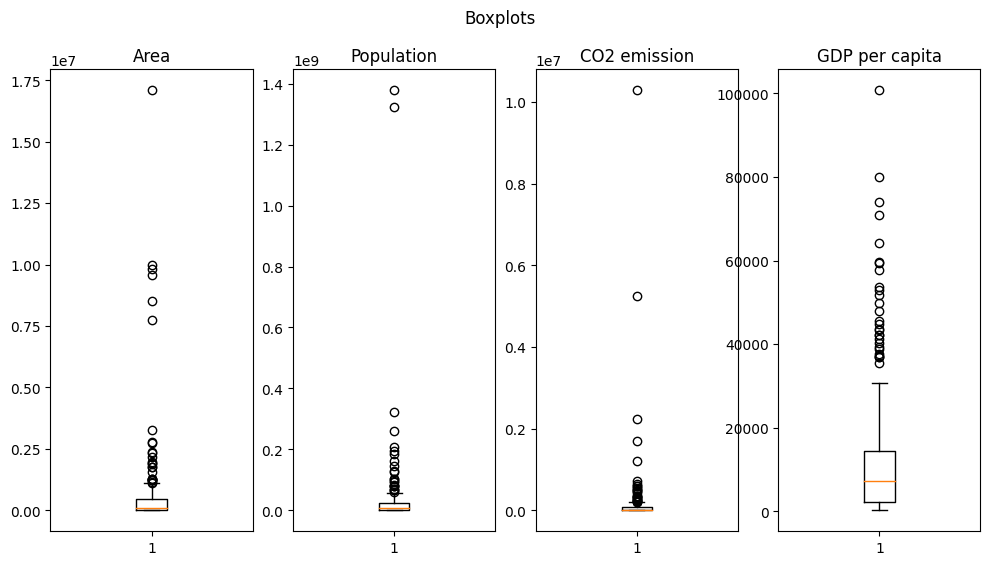

In [44]:
create_boxplots(dataset)


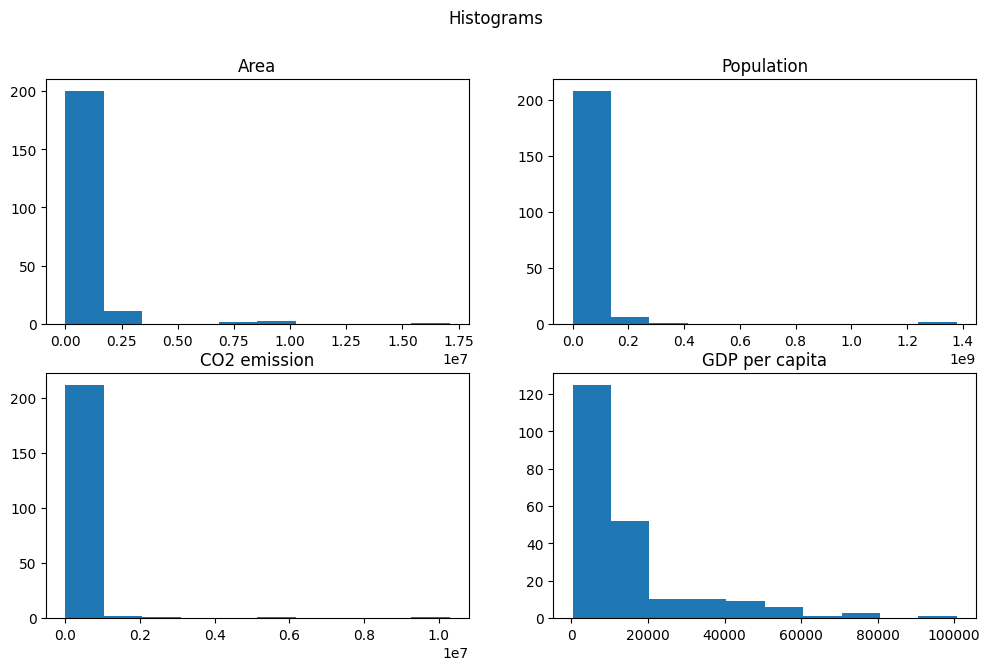

In [46]:
create_hists(dataset)


In [8]:
country_max_gdp(dataset)



---------///----------

Name of the country with the max GDP per capita:  Luxembourg
The max GDP per capita:  100738.6842

---------///----------



In [9]:
country_min_area(dataset)



---------///----------

Name of the country with the min Area:  Monaco
The min Area:  2.0

---------///----------



In [16]:
max_avg_area_in_region(dataset)


---------///----------

Name of the Region with the max mean Area:  North America
The max mean Area:  6605410.0

---------///----------



C:\Users\Пользователь\AppData\Local\Temp\ipykernel_20608\3038387550.py:84: FutureWarning: The operation <function mean at 0x000001BE17DB3280> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  avg_area = dataset.groupby('Region').agg(np.mean)


In [17]:
max_density_in_regions(dataset)


---------///----------

Name of the country with the max density in the world:  Macao SAR, China
The max density in the world:  20203.531353135313

---------///----------


---------///----------

Name of the country with the max density in Europe & Central Asia:  Monaco
The max density in Europe & Central Asia:  19249.5

---------///----------



In [18]:
median_mean_region_equal(dataset)



Average gdp in region:  Region
East Asia & Pacific           15124.489231
Europe & Central Asia         22733.595488
Latin America & Caribbean     10468.495458
Middle East & North Africa    15449.053926
North America                 37732.095786
South Asia                     2795.213935
Sub-Saharan Africa             2874.243005
Name: GDP per capita, dtype: float64

Median gdp in region:  Region
East Asia & Pacific            5910.620932
Europe & Central Asia         13374.833168
Latin America & Caribbean     10833.201075
Middle East & North Africa    13374.833168
North America                 42183.295100
South Asia                     1576.608412
Sub-Saharan Africa             1034.390361
Name: GDP per capita, dtype: float64

Regions when coincide average and median gdp: 
 Empty DataFrame
Columns: [GDP per capita]
Index: []


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_20608\3038387550.py:112: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regions_average_gdp = dataset.groupby(['Region']).mean()['GDP per capita']
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_20608\3038387550.py:113: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regions_mediana_gdp = dataset.groupby(['Region']).median()['GDP per capita']


In [19]:
top_least_5_gdp(dataset)


---------///----------

Top 5 countries by GDP:

       Country Name                 Region  GDP per capita   Populatiion  CO2 emission       Area    Population     Density           GDP
206   United States          North America    57638.159090  3.231275e+08  5.254279e+06  9831510.0  3.231275e+08   32.866519  1.862448e+13
41            China    East Asia & Pacific     8123.180873  1.378665e+09  1.029193e+07  9562911.0  1.378665e+09  144.167921  1.119915e+13
97            Japan    East Asia & Pacific    38900.569310  1.269945e+08  1.214048e+06   377962.0  1.269945e+08  335.998092  4.940159e+12
72          Germany  Europe & Central Asia    42161.319660  8.266768e+07  7.198834e+05   357380.0  8.266768e+07  231.315924  3.485379e+12
205  United Kingdom  Europe & Central Asia    40367.037840  6.563724e+07  4.198202e+05   243610.0  6.563724e+07  269.435733  2.649581e+12
Last 5 countries by GDP:

         Country Name               Region  GDP per capita  Populatiion  CO2 emission   Area  Po

In [20]:
top_least_5_co2_per_capita(dataset)



---------///----------

Top 5 countries by CO2 per capita:

                 Country Name                     Region  GDP per capita  Populatiion   CO2 emission   Area  Population       Density           GDP  CO2 per capita
182  St. Martin (French part)  Latin America & Caribbean    13374.833168      31949.0  165114.116337   54.4     31949.0    587.297794  4.273125e+08        5.168053
163                San Marino      Europe & Central Asia    47908.561410      33203.0  165114.116337   60.0     33203.0    553.383333  1.590708e+09        4.972867
130                    Monaco      Europe & Central Asia    13374.833168      38499.0  165114.116337    2.0     38499.0  19249.500000  5.149177e+08        4.288790
145  Northern Mariana Islands        East Asia & Pacific    22572.378820      55023.0  165114.116337  460.0     55023.0    119.615217  1.242000e+09        3.000820
3              American Samoa        East Asia & Pacific    11834.745230      55599.0  165114.116337  200.0     55599.0